<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering: A Quick Overview**

K-Means is an unsupervised machine learning algorithm widely used for clustering. It aims to partition a dataset into K clusters, where each item belongs to the cluster with the closest mean, also known as the cluster centroid.

**How K-Means Works:**

* **Initialization**: We start by randomly selecting K points as initial cluster centroids.
* **Assignment**: Each data point is assigned to the nearest centroid, forming clusters.
* **Update**: The centroids are recalculated as the average of the items in each cluster.
* **Repeat**: Steps 2 and 3 are repeated until a specified number of iterations or convergence.

At the end of this process, we have our final clusters.

**Advantages:**
* **Faster** than many other clustering techniques.
* **Strong coupling** between data points, ensuring clear clusters.

**Disadvantages:**
* Requires selecting **initial centroids** for clusters, which can affect results.
* We need to specify the **number of clusters (K)** in advance, which can be tricky.

**Methods to Overcome These Disadvantages:**

**Elbow Method:**
This method helps to find the optimal value of K. It plots the Within-Cluster Sum of Squares (WCSS) against the number of clusters. WCSS is calculated using:

𝑊
𝐶
𝑆
𝑆
=
∑
𝑖
=
1
𝑘
∑
𝑥
∈
𝐶
𝑖
∥
(
𝑥
−
𝜇
𝑖
)
^
2


Where:

* 𝐶
𝑖 is the ith cluster,

* 𝑥 is a data point, and

* 𝜇
𝑖  is the centroid of the ith cluster.

* We look for an "elbow" point where the reduction in WCSS starts to slow down, indicating the ideal number of clusters.


**Silhouette Method:**
This method evaluates how well each point fits within its cluster and how well-separated it is from other clusters. The silhouette score is calculated as:

𝑠
(
𝑖
)
=
𝑏
(
𝑖
)
−
𝑎
(
𝑖
)/
max
⁡
(
𝑎
(
𝑖
)
,
𝑏
(
𝑖
)
)

Where:

* a(i) is the average distance between a point and other points in its own cluster.

* b(i) is the average distance between a point and the points in the nearest neighboring cluster.
A silhouette score close to 1 indicates well-separated, cohesive clusters, while a score near -1 indicates that the point is in the wrong cluster.



**Importing Dependencies**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Data Collection & Analysis**

In [2]:
customer_df = pd.read_csv("/content/drive/MyDrive/KMeans/Mall_Customers.csv")

In [3]:
customer_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
customer_df.shape

(200, 5)

**Data Preprocessing**

In [7]:
customer_df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [8]:
customer_df.duplicated().sum()

0

**Choosing Major features**

In [9]:
X = customer_df.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

**choosing number of clusters using elbow method**

In [10]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

**plotting elbow graph**

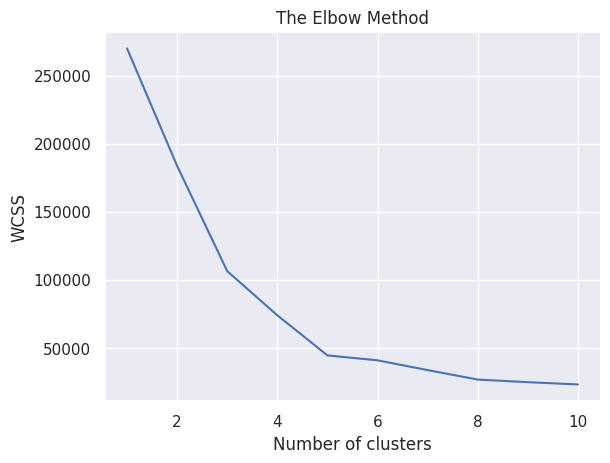

In [11]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

**Traning Model**

In [12]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [13]:
y_kmeans = kmeans.fit_predict(X)

In [14]:
print(y_kmeans)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


**data visualization**

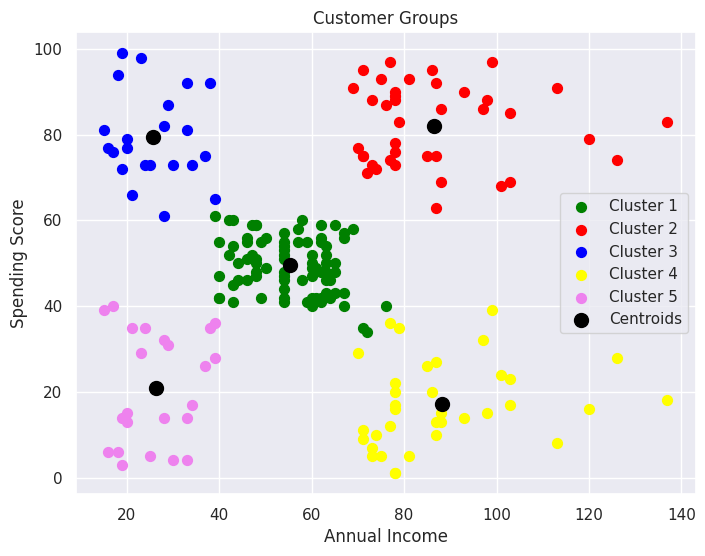

In [15]:
#plotting Data Points
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],s=50,c='blue',label='Cluster 3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],s=50,c='violet',label='Cluster 5')

#plotting Centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

By observing the graph, we can conclude:

* **Cluster 1**: Represents customers with **average income** and **average spending**.
* **Cluster 2**: Consists of customers with **high income** and **high spending**.
* **Cluster 3**: Contains customers with **low income** but **high spending**.
* **Cluster 4**: Includes customers with **high income** but **low spending**.
* **Cluster 5**: Represents customers with **low income** and **low spending**.

These clusters provide valuable insights into different customer segments based on their financial behavior.